# Borehole Plot V1.0

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import matplotlib.patches as patches

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
data = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/Projects/office work/Geotech/RRTS/plot.csv')
data.head()

,borehole,chainage,from,to,soil
0,BH-181,100,0.0,1.5,Fill Material
1,BH-181,100,1.5,6.0,Clayey Silt (CL-CI)
2,BH-181,100,6.0,12.0,Silty Sand (SM)
3,BH-181,100,12.0,13.0,Clayey Silt (CL-CI)
4,BH-181,100,13.0,17.0,Silty Sand (SM)


In [80]:
data.keys()

Index(['borehole', 'chainage', 'from', 'to', 'soil'], dtype='object')

In [81]:
encoder = LabelEncoder()
data['label'] = encoder.fit_transform(data['soil'].values)
data['thickness'] = data['to'] - data['from']
data.head()

,borehole,chainage,from,to,soil,label,thickness
0,BH-181,100,0.0,1.5,Fill Material,2,1.5
1,BH-181,100,1.5,6.0,Clayey Silt (CL-CI),1,4.5
2,BH-181,100,6.0,12.0,Silty Sand (SM),5,6.0
3,BH-181,100,12.0,13.0,Clayey Silt (CL-CI),1,1.0
4,BH-181,100,13.0,17.0,Silty Sand (SM),5,4.0


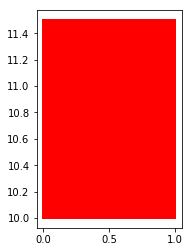

In [0]:
# plotting a patch
circle = plt.Rectangle((0,10),1,1.5,linewidth=2,edgecolor='r',facecolor='red')
plt.gca().add_patch(circle)

plt.axis('scaled')
plt.show()

In [83]:
colors = [ "red", "blue", "green", "yellow", "purple", "orange", "white", "magenta","cyan","darkslategray","chocolate"]
len(colors)

11

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """


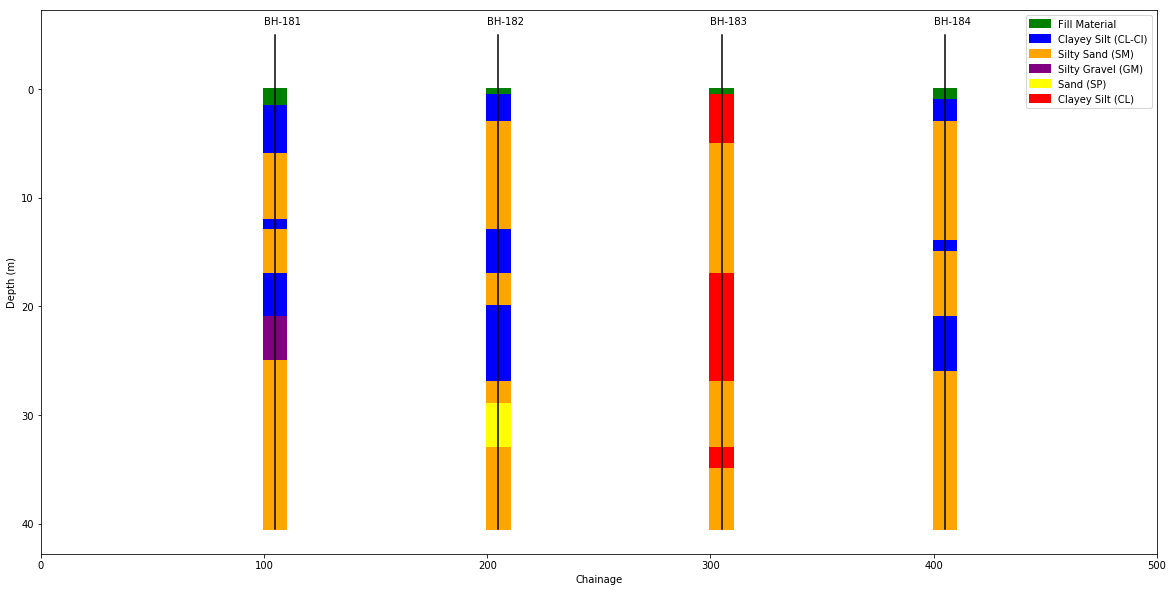

In [103]:
plt.figure(figsize=(20,10))
chainage_limit = np.max(df['chainage'].values)
depth_limits = (np.min(df['from'].values),np.max(df['to'].values))

for bh,df in data.groupby(('borehole','chainage')):
  # plotting the borehole
  bh_data = df.values
  chainage = df['chainage'].unique()[0]
  
  for i in range(bh_data.shape[0]):
    color = colors[bh_data[i][5]]
    patch = plt.Rectangle((chainage,bh_data[i][2]),10,bh_data[i][6],linewidth=2,edgecolor=color,facecolor=color)
    plt.gca().add_patch(patch)
    
  plt.plot([chainage+5,chainage+5],[depth_limits[0]-5,depth_limits[1]],color='black')
  plt.text(x=chainage, y = depth_limits[0]-6, s=bh[0])

  # for preparing the legend
soil_patch_handle = []
color_handle = []
encoded = data['label'].unique()

for i,label in enumerate(encoded):
  soil = encoder.inverse_transform([label])[0]
  color = colors[label]
  rect = plt.Rectangle((0,0),0,0,linewidth=2,edgecolor=color,facecolor=color,label=soil)  # dummy patch
  soil_patch_handle.append(rect)m
  color_handle.append(soil)
  
plt.plot() 
plt.legend((soil_patch_handle), (color_handle))
plt.gca().invert_yaxis()
plt.ylabel('Depth (m)')
plt.xlim(0,chainage_limit+100)
plt.xlabel('Chainage')
plt.show()
